In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [4]:
import pingouin as pg

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
iris_df["Species"]=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_df["Species"].value_counts()

,count
Species,
0,50
1,50
2,50


In [11]:
Species_map = {0: "setosa", 1: "verscilor", 2:"virginica"}
iris_df["Species"] = iris_df["Species"].map(Species_map)
iris_df["Species"]

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [12]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Species,0


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#groupby
iris_df.groupby("Species")["sepal width (cm)"].mean()

,sepal width (cm)
Species,
setosa,3.428
verscilor,2.770
virginica,2.974


In [15]:
iris_df.groupby("Species")["petal length (cm)"].std()

,petal length (cm)
Species,
setosa,0.173664
verscilor,0.469911
virginica,0.551895


In [16]:
group_stats=iris_df.groupby("Species").describe()
group_stats.T #ovo .T je za transponiranje

Species                     setosa  verscilor  virginica
sepal length (cm) count  50.000000  50.000000  50.000000
                  mean    5.006000   5.936000   6.588000
                  std     0.352490   0.516171   0.635880
                  min     4.300000   4.900000   4.900000
                  25%     4.800000   5.600000   6.225000
                  50%     5.000000   5.900000   6.500000
                  75%     5.200000   6.300000   6.900000
                  max     5.800000   7.000000   7.900000
sepal width (cm)  count  50.000000  50.000000  50.000000
                  mean    3.428000   2.770000   2.974000
                  std     0.379064   0.313798   0.322497
                  min     2.300000   2.000000   2.200000
                  25%     3.200000   2.525000   2.800000
                  50%     3.400000   2.800000   3.000000
                  75%     3.675000   3.000000   3.175000
                  max     4.400000   3.400000   3.800000
petal length (cm) count  50.000000  50.000000  50.000000
                  mean    1.462000   4.260000   5.552000
                  std     0.173664   0.469911   0.551895
                  min     1.000000   3.000000   4.500000
                  25%     1.400000   4.000000   5.100000
                  50%     1.500000   4.350000   5.550000
                  75%     1.575000   4.600000   5.875000
                  max     1.900000   5.100000   6.900000
petal width (cm)  count  50.000000  50.000000  50.000000
                  mean    0.246000   1.326000   2.026000
                  std     0.105386   0.197753   0.274650
                  min     0.100000   1.000000   1.400000
                  25%     0.200000   1.200000   1.800000
                  50%     0.200000   1.300000   2.000000
                  75%     0.300000   1.500000   2.300000
                  max     0.600000   1.800000   2.500000

Text(0.5, 1.0, 'Pairplot za Iris')

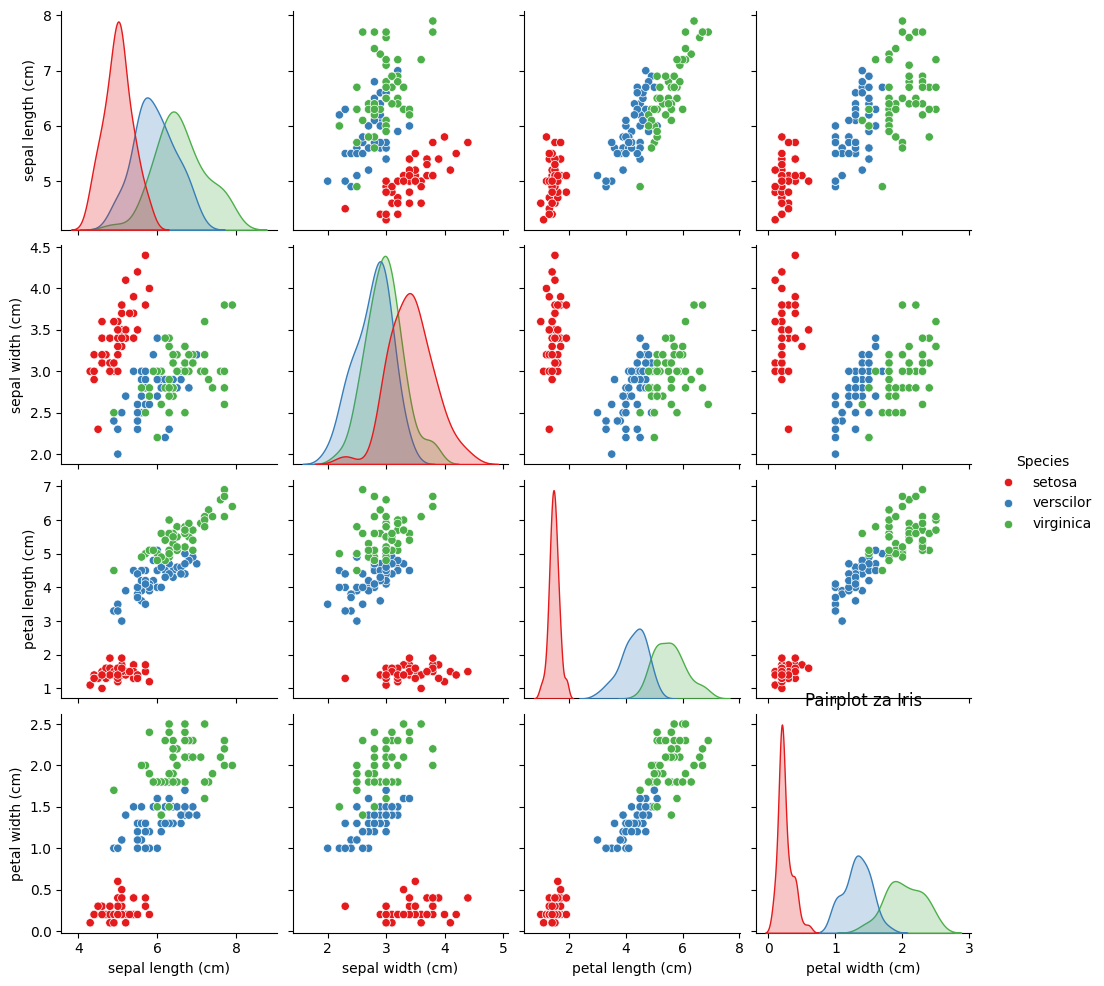

In [17]:
#pairplot
sns.pairplot(data=iris_df, hue="Species", palette="Set1")
plt.title("Pairplot za Iris")

Text(0.5, 1.0, 'Pairplot za Iris')

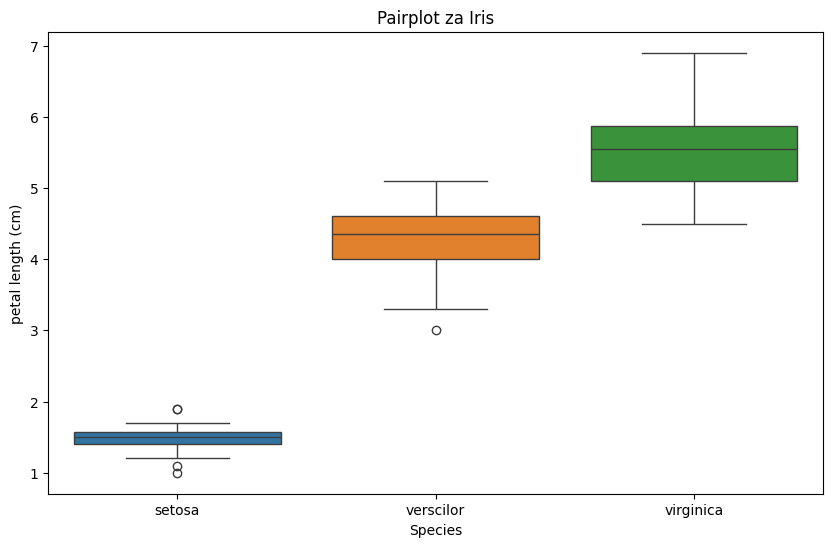

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Species", y="petal length (cm)", data=iris_df, hue="Species")
plt.title("Pairplot za Iris")

Text(0.5, 1.0, 'Violin plot za Iris')

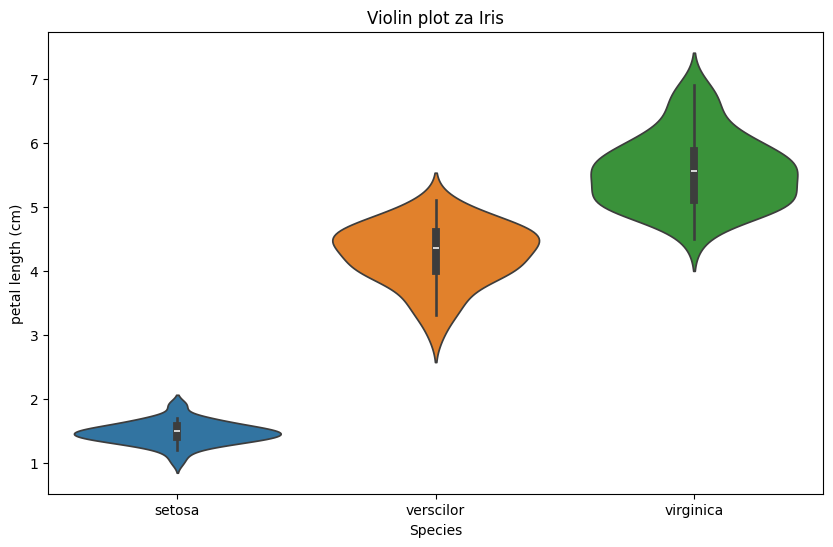

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Species", y="petal length (cm)", data=iris_df, hue="Species")
plt.title("Violin plot za Iris")

In [20]:
set_versi=iris_df[iris_df["Species"].isin(["setosa", "verscilor"])]
set_versi

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,verscilor
96,5.7,2.9,4.2,1.3,verscilor
97,6.2,2.9,4.3,1.3,verscilor
98,5.1,2.5,3.0,1.1,verscilor


In [21]:
grupa1 = set_versi[set_versi["Species"]=="setosa"]["sepal length (cm)"]
grupa1

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


In [22]:
grupa2 = set_versi[set_versi["Species"]=="verscilor"]["sepal length (cm)"]
grupa2

,sepal length (cm)
50,7.0
51,6.4
52,6.9
53,5.5
54,6.5
55,5.7
56,6.3
57,4.9
58,6.6
59,5.2


In [23]:
# t-test
# p value < 0.05

ttest = pg.ttest(grupa1, grupa2)
print('T-test rezultati (setosa vs versicolor, sepal length):\n', ttest)

T-test rezultati (setosa vs versicolor, sepal length):
                 T  dof alternative         p-val           CI95%   cohen-d  \
T-test -10.520986   98   two-sided  8.985235e-18  [-1.11, -0.75]  2.104197   

            BF10 power  
T-test  4.19e+14   NaN  


In [30]:
sirina = pg.ttest(iris_df[iris_df['Species'] == 'setosa']['sepal width (cm)'],
                  iris_df[iris_df['Species'] == 'verscilor']['sepal width (cm)'])
sirina

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.454976,98,two-sided,1.845260e-15,"[0.52, 0.8]",1.890995,2.467e+12,1.0


In [32]:
anova = pg.anova(dv='sepal length (cm)', between='Species', data=iris_df)
anova

,Source,ddof1,ddof2,F,p-unc,np2
0,Species,2,147,119.264502,1.669669e-31,0.618706


In [33]:
# korelacija

corr = pg.corr(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])
corr

,n,r,CI95%,p-val,BF10,power
pearson,150,0.871754,"[0.83, 0.91]",1.038667e-47,1.811e+44,1.0


In [34]:
iris_df[['sepal length (cm)', 'petal length (cm)']].corr()

,sepal length (cm),petal length (cm)
sepal length (cm),1.000000,0.871754
petal length (cm),0.871754,1.000000
